# Matrices


We denote matrices by bold capital letters (e.g., $X$, $Y$, and $Z$), and represent them in code by `pd.DataFrame`. The expression $\mathbf{A} \in \mathbb{R}^{m \times n}$ indicates that a matrix $\textbf{A}$ contains $m \times n$ real-valued scalars, arranged as $m$ rows and $n$ columns. When 
$m = n$, we say that a matrix is _square_. Visually, we can illustrate any matrix as a table. To refer to an individual element, we subscript both the row and column indices, e.g., $a_{ij}$ is the value that belongs to $\mathbf{A}$’s $i^{th}$ row and $j^{th}$ column:

$$ \begin{split}\mathbf{A}=\begin{bmatrix} a_{11} & a_{12} & \cdots & a_{1n} \\ a_{21} & a_{22} & \cdots & a_{2n} \\ \vdots & \vdots & \ddots & \vdots \\ a_{m1} & a_{m2} & \cdots & a_{mn} \\ \end{bmatrix}.\end{split} $$


In [13]:
import pandas as pd 

df = pd.DataFrame({'a': [1, 20, 3, 40], 'b': [50, 6, 70, 8]})

df.index = ['v1', 'v2', 'v3', 'v4']

df

,a,b
v1,1,50
v2,20,6
v3,3,70
v4,40,8


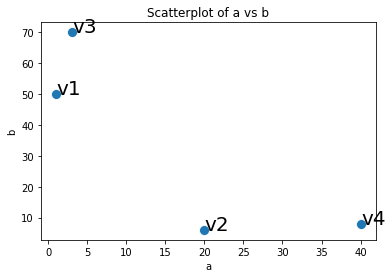

In [14]:
import seaborn as sns
from matplotlib import pyplot as plt

ax = sns.scatterplot(x='a', y='b', data=df, s=100);
ax.set(title='Scatterplot of a vs b', xlabel='a', ylabel='b');

def annotate(row):
    plt.text(x=row['a']+0.05, y=row['b'], s=row.name, size=20);

df.apply(annotate, axis=1);

## Transpose


Sometimes we want to flip the axes. When we exchange a matrix’s rows and columns, the result is called its transpose. Formally, we signify a matrix’s $\textbf{A}$ transpose by $\mathbf{A}^\top$ and if $\mathbf{B} = \mathbf{A}^\top$, then $b_{ij} = a_{ij}$ for all $i$ and $j$. Thus, the transpose of an $m \times n$ matrix is an $n \times m$ matrix:

$$ \begin{split}\mathbf{A}^\top =
\begin{bmatrix}
    a_{11} & a_{21} & \dots  & a_{m1} \\
    a_{12} & a_{22} & \dots  & a_{m2} \\
    \vdots & \vdots & \ddots  & \vdots \\
    a_{1n} & a_{2n} & \dots  & a_{mn}
\end{bmatrix}.\end{split} $$

<!-- We can convert any appropriately sized 
 tensor into an 
 matrix by passing the desired shape to reshape:

A matrix is a rectangular array of numbers. Matrices are often used to represent linear transformations such as rotations and reflections. For example, a matrix can be used to represent a rotation of 90 degrees clockwise about the origin.

Matrices can be added together to form new matrices. For example, the matrix representing a rotation of 90 degrees clockwise about the origin can be added to the matrix representing a rotation of 90 degrees counterclockwise about the origin to form the matrix representing a rotation of 180 degrees about the origin.

Matrices can also be multiplied together to form new matrices. For example, the matrix representing a rotation of 90 degrees clockwise about the origin can be multiplied by the matrix representing a rotation of 90 degrees counterclockwise about the origin to form the matrix representing a rotation of 180 degrees about the origin. -->


In pandas, you can transpose a `DataFrame` with the **`.T`** attribute:

In [10]:
df.T

,0,1,2
a,1,2,3
b,4,5,6
c,7,8,9


Note that columns of original dataframe `df` are the same as index of `df.T`

In [11]:
df.columns == df.T.index

array([ True,  True,  True])

In [23]:
df.T

,0,1,2,3
a,1,20,3,40
b,50,6,70,8



## Matrix-Vector Products

Now that we know how to calculate dot products, we can begin to understand the product between an $m \times n$ matrix and an 
$n$-dimensional vector $\mathbf{x}$. 

To start off, we visualize our matrix in terms of its row vectors

$$
\begin{split}\mathbf{A}=
\begin{bmatrix}
\mathbf{a}^\top_{1} \\
\mathbf{a}^\top_{2} \\
\vdots \\
\mathbf{a}^\top_m \\
\end{bmatrix},\end{split}
$$

where each $\mathbf{a}^\top_{i} \in \mathbb{R}^n$ is a row vector representing the $i^\textrm{th}$ row of the matrix $\mathbf{A}$.

The matrix–vector product $\mathbf{A}\mathbf{x}$
 is simply a column vector of length $m$
, whose $i^{th}$
 element is the dot product $\mathbf{a}^\top_i \mathbf{x}$

$$
 \begin{split}\mathbf{A}\mathbf{x}
= \begin{bmatrix}
\mathbf{a}^\top_{1} \\
\mathbf{a}^\top_{2} \\
\vdots \\
\mathbf{a}^\top_m \\
\end{bmatrix}\mathbf{x}
= \begin{bmatrix}
 \mathbf{a}^\top_{1} \mathbf{x}  \\
 \mathbf{a}^\top_{2} \mathbf{x} \\
\vdots\\
 \mathbf{a}^\top_{m} \mathbf{x}\\
\end{bmatrix}.\end{split}
$$

We can think of multiplication with a matrix $\mathbf{A}\in \mathbb{R}^{m \times n}$ as a transformation that projects vectors from $\mathbb{R}^{n}$ to  $\mathbb{R}^{m}$. 

These transformations are remarkably useful. For example, we can represent rotations as multiplications by certain square matrices. Matrix–vector products also describe the key calculation involved in computing the outputs of each layer in a neural network given the outputs from the previous layer.


### Finding similar vectors

Note that, given a vector $\mathbf{v}$, vector-matrix products can also be used to compute the similarity of $\mathbf{v}$ and each row $\mathbf{a}^\top_i$ of matrix $\mathbf{A}$. This is because the matrix-vector product $\mathbf{A}\mathbf{v}$ will contain the dot products of $\mathbf{v}$ and each row in $\mathbf{A}$.

There is one thing to be careful about: recall that the formula for cosine similarity is: 

$$\text{cos}(\theta) = \frac{\mathbf{a} \cdot \mathbf{b}}{\|\mathbf{a}\| \|\mathbf{b}\|}$$

**The dot product (numerator, on the right hand side) is equal to the cosine of the angle between the two vectors when the vectors are normalized (i.e. each divided by their norms).**

The example below shows how to compute the cosine similarity between a vector $\mathbf{v}$ and each row of matrix $\mathbf{A}$.

In [1]:
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/fahadsultan/datascience_ml/main/data/chat_dataset.csv')

In [2]:
# creating bow representation
vocab = (' '.join(data['message'].values)).lower().split()
bow = pd.DataFrame(columns=vocab)
for word in vocab: 
    bow[word] = data['message'].apply(lambda msg: msg.count(word))

In [4]:
bow.head()

,i,really,enjoyed,the,movie,the,food,was,terrible,i'm,...,ex,is,dating,someone,new.,i,feel,so,heartbroken,💔😢
0,1,1,1,1,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,1,1,1,0,...,0,0,0,0,0,1,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
3,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


In [5]:
# l2 norm of a vector
def l2_norm(vec):
    return (sum(vec**2))**(1/2)

# bow where each row is a unit vectors i.e. ||row|| = 1
bow_unit = bow.apply(lambda row: row/l2_norm(row), axis=1)

In [7]:
bow_unit.head()

,i,really,enjoyed,the,movie,the,food,was,terrible,i'm,...,ex,is,dating,someone,new.,i,feel,so,heartbroken,💔😢
0,0.040962,0.040962,0.040962,0.040962,0.040962,0.040962,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.040962,0.000000,0.0,0.0,0.0
1,0.045932,0.000000,0.000000,0.000000,0.000000,0.000000,0.045932,0.045932,0.045932,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.045932,0.000000,0.0,0.0,0.0
2,0.036637,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.036637,0.0,0.0,0.0,0.036637,0.036637,0.0,0.0,0.0
3,0.045739,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.045739,0.000000,0.0,...,0.045739,0.000000,0.0,0.0,0.0,0.045739,0.000000,0.0,0.0,0.0
4,0.029683,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.029683,0.000000,0.0,0.0,0.0,0.029683,0.000000,0.0,0.0,0.0


In [19]:
# random message : I don't have an opinion on this
msg = bow_unit.iloc[20] 

# cosine similarity of first message with all other messages
msg_sim = bow_unit.dot(msg.T)

msg_sim.index = data['message']

msg_sim.sort_values(ascending=False)

message
I don't have an opinion on this           1.000000
I don't really have an opinion on this    0.984003
I have no strong opinion about this       0.971575
I have no strong opinions about this      0.971226
I have no strong opinion on this          0.969768
                                            ...   
I'm not sure what to do 😕                 0.204587
I'm not sure what to do next 🤷‍♂️         0.201635
I'm not sure what to do next 🤔            0.200593
The food was not good                     0.200295
The food was not very good                0.197220
Length: 584, dtype: float64


## Matrix-Matrix Multiplication

Once you have gotten the hang of dot products and matrix–vector products, then matrix–matrix multiplication should be straightforward.

Say that we have two matrices $\mathbf{A} \in \mathbb{R}^{n \times k}$ and $\mathbf{B} \in \mathbb{R}^{k \times m}$:

$$ 
\begin{split}\mathbf{A}=\begin{bmatrix}
 a_{11} & a_{12} & \cdots & a_{1k} \\
 a_{21} & a_{22} & \cdots & a_{2k} \\
\vdots & \vdots & \ddots & \vdots \\
 a_{n1} & a_{n2} & \cdots & a_{nk} \\
\end{bmatrix},\quad
\mathbf{B}=\begin{bmatrix}
 b_{11} & b_{12} & \cdots & b_{1m} \\
 b_{21} & b_{22} & \cdots & b_{2m} \\
\vdots & \vdots & \ddots & \vdots \\
 b_{k1} & b_{k2} & \cdots & b_{km} \\
\end{bmatrix}.\end{split}
$$

Let $\mathbf{a}^\top_{i} \in \mathbb{R}^k$
 denote the row vector representing the $i^\textrm{th}$
 row of the matrix $\mathbf{A}$
 and let $\mathbf{b}_{j} \in \mathbb{R}^k$
 denote the column vector from the $j^\textrm{th}$
 column of the matrix $\mathbf{B}$
:

$$
\begin{split}\mathbf{A}=
\begin{bmatrix}
\mathbf{a}^\top_{1} \\
\mathbf{a}^\top_{2} \\
\vdots \\
\mathbf{a}^\top_n \\
\end{bmatrix},
\quad \mathbf{B}=\begin{bmatrix}
 \mathbf{b}_{1} & \mathbf{b}_{2} & \cdots & \mathbf{b}_{m} \\
\end{bmatrix}.\end{split}
$$

To form the matrix product $\mathbf{C} \in \mathbb{R}^{n \times m}$
, we simply compute each element $c_{ij}$
 as the dot product between the $i^{\textrm{th}}$
 row of $\mathbf{A}$
 and the $i^{\textrm{th}}$
 column of $\mathbf{B}$
, i.e., $\mathbf{a}^\top_i \mathbf{b}_j$
:

$$
\begin{split}\mathbf{C} = \mathbf{AB} = \begin{bmatrix}
\mathbf{a}^\top_{1} \\
\mathbf{a}^\top_{2} \\
\vdots \\
\mathbf{a}^\top_n \\
\end{bmatrix}
\begin{bmatrix}
 \mathbf{b}_{1} & \mathbf{b}_{2} & \cdots & \mathbf{b}_{m} \\
\end{bmatrix}
= \begin{bmatrix}
\mathbf{a}^\top_{1} \mathbf{b}_1 & \mathbf{a}^\top_{1}\mathbf{b}_2& \cdots & \mathbf{a}^\top_{1} \mathbf{b}_m \\
 \mathbf{a}^\top_{2}\mathbf{b}_1 & \mathbf{a}^\top_{2} \mathbf{b}_2 & \cdots & \mathbf{a}^\top_{2} \mathbf{b}_m \\
 \vdots & \vdots & \ddots &\vdots\\
\mathbf{a}^\top_{n} \mathbf{b}_1 & \mathbf{a}^\top_{n}\mathbf{b}_2& \cdots& \mathbf{a}^\top_{n} \mathbf{b}_m
\end{bmatrix}.\end{split}
$$
 
 
We can think of the matrix–matrix multiplication $\mathbf{AB}$ as performing $m$ matrix–vector products or $m \times n$ dot products and stitching the results together to form an $m \times n$ matrix. In the following snippet, we perform matrix multiplication on A and B. Here, A is a matrix with two rows and three columns, and B is a matrix with three rows and four columns. After multiplication, we obtain a matrix with two rows and four columns.


### Computing similarity / distance matrix 

Note that, given two matrices $\mathbf{A}$ and $\mathbf{B}$, matrix-matrix products can also be used to compute the similarity between each row $\mathbf{a}^\top_i$ of matrix $\mathbf{A}$ and each row $\mathbf{b}^\top_j$ of matrix $\mathbf{B}$. This is because the matrix-matrix product $\mathbf{A}\mathbf{B}$ will contain the dot products of each pair of rows in $\mathbf{A}$ and $\mathbf{B}$.

In [14]:
data.shape

(584, 2)

In [12]:
similarity_matrix = bow_unit.dot(bow_unit.T)

similarity_matrix.shape

(584, 584)

In [15]:
similarity_matrix.head()

,0,1,2,3,4,5,6,7,8,9,...,574,575,576,577,578,579,580,581,582,583
0,1.000000,0.568191,0.453216,0.565809,0.612787,0.608156,0.377769,0.631309,0.793969,0.642410,...,0.516106,0.612624,0.660911,0.490580,0.845518,0.573549,0.648564,0.629598,0.594468,0.570452
1,0.568191,1.000000,0.508206,0.928580,0.687137,0.681944,0.423604,0.707906,0.551139,0.720354,...,0.573755,0.686954,0.741100,0.546166,0.801864,0.643139,0.721001,0.705988,0.652357,0.639666
2,0.453216,0.508206,1.000000,0.506075,0.548093,0.707857,0.778316,0.621438,0.538883,0.648861,...,0.457088,0.547948,0.650512,0.443105,0.593732,0.512998,0.574392,0.605515,0.520351,0.609064
3,0.565809,0.928580,0.506075,1.000000,0.685614,0.679085,0.421828,0.704938,0.548828,0.717334,...,0.571349,0.684074,0.737993,0.543876,0.798502,0.640442,0.717978,0.703027,0.649622,0.638039
4,0.612787,0.687137,0.548093,0.685614,1.000000,0.735468,0.273748,0.559585,0.714100,0.599091,...,0.926494,0.825530,0.806139,0.933257,0.802775,0.945544,0.931874,0.913601,0.928473,0.690556


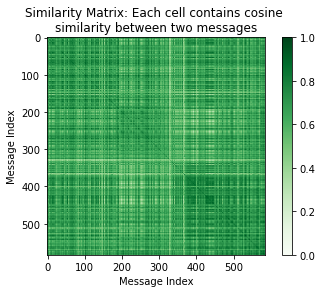

In [16]:
from matplotlib import pyplot as plt
plt.imshow(similarity_matrix, cmap='Greens')
plt.colorbar();
plt.title("Similarity Matrix: Each cell contains cosine \nsimilarity between two messages");
plt.xlabel("Message Index");
plt.ylabel("Message Index");

Note how 1. the similarity matrix is symmetric, i.e. $sim_{ij} = sim_{ji}$ and 2. the diagonal elements are all 1, i.e. $sim_{ii} = 1$.

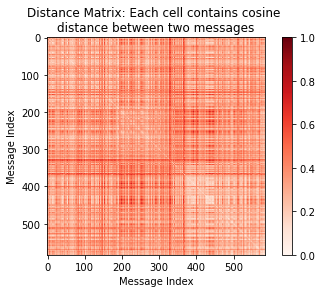

In [42]:
distance_matrix = 1 - bow_unit.dot(bow_unit.T)

from matplotlib import pyplot as plt
plt.imshow(distance_matrix, cmap='Reds')
plt.colorbar();
plt.title("Distance Matrix: Each cell contains cosine \ndistance between two messages");
plt.xlabel("Message Index");
plt.ylabel("Message Index");

<!-- ## Linear Transformations

A linear transformation is a function that maps vectors to vectors. For example, a rotation of 90 degrees clockwise about the origin is a linear transformation that maps vectors to vectors.

Linear transformations can be represented as matrices. For example, a rotation of 90 degrees clockwise about the origin can be represented as the matrix

$$ \begin{bmatrix} 0 & -1 \\ 1 & 0 \end{bmatrix} $$

## Norms

Norms, in the case of matrices, are more complicated. After all, matrices can be viewed both as collections of individual entries and as objects that operate on vectors and transform them into other vectors. For instance, we can ask by how much longer the matrix–vector product $\mathbf{X} \mathbf{v}$ could be relative to 
. This line of thought leads to what is called the spectral norm. For now, we introduce the Frobenius norm, which is much easier to compute and defined as the square root of the sum of the squares of a matrix’s elements:

$$ \|\mathbf{X}\|_\textrm{F} = \sqrt{\sum_{i=1}^m \sum_{j=1}^n x_{ij}^2} $$

The Frobenius norm behaves as if it were an $l_2$ norm of a matrix-shaped vector. Invoking the following function will calculate the Frobenius norm of a matrix.

While we do not want to get too far ahead of ourselves, we already can plant some intuition about why these concepts are useful. In deep learning, we are often trying to solve optimization problems: maximize the probability assigned to observed data; maximize the revenue associated with a recommender model; minimize the distance between predictions and the ground truth observations; minimize the distance between representations of photos of the same person while maximizing the distance between representations of photos of different people. These distances, which constitute the objectives of deep learning algorithms, are often expressed as norms. -->

<!-- ## Tensors -->

<!-- While you can go far in your machine learning journey with only scalars, vectors, and matrices, eventually you may need to work with higher-order tensors. Tensors give us a generic way of describing extensions to $n^{th}$-order arrays. We call software objects of the _tensor_ class “tensors” precisely because they too can have arbitrary numbers of axes. While it may be confusing to use the word tensor for both the mathematical object and its realization in code, our meaning should usually be clear from context. We denote general tensors by capital letters with a special font face (e.g., $\mathsf{X}$, $\mathsf{Y}$, and $\mathsf{Z}$) and their indexing mechanism (e.g., $x_{ijk}$ and $[\mathsf{X}_{1,2i-1,3}]$) follows naturally from that of matrices.

Tensors will become more important when we start working with images. Each image arrives as a 
-order tensor with axes corresponding to the height, width, and channel. At each spatial location, the intensities of each color (red, green, and blue) are stacked along the channel. Furthermore, a collection of images is represented in code by a 
-order tensor, where distinct images are indexed along the first axis. Higher-order tensors are constructed, as were vectors and matrices, by growing the number of shape components. -->

<!-- <center>

<img width="70%" src="../assets/tensors.png">

<img width="70%" src="../assets/tensors2.png">

<img width="30%" src="../assets/tensors3.png">

</center> -->